<a href="https://colab.research.google.com/github/Trace-dap-troai/Chapter-3_Time_Series_Analysis/blob/main/Chapter_3_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Download Apple stock data (daily)
df = yf.download("AAPL", start="2022-01-01", end="2025-01-01")

#Close price
df = df[['Close']]
df.dropna(inplace=True)

df.head()

/tmp/ipython-input-525/3452575706.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2022-01-03,178.103622
2022-01-04,175.843262
2022-01-05,171.165848
2022-01-06,168.308502
2022-01-07,168.474884


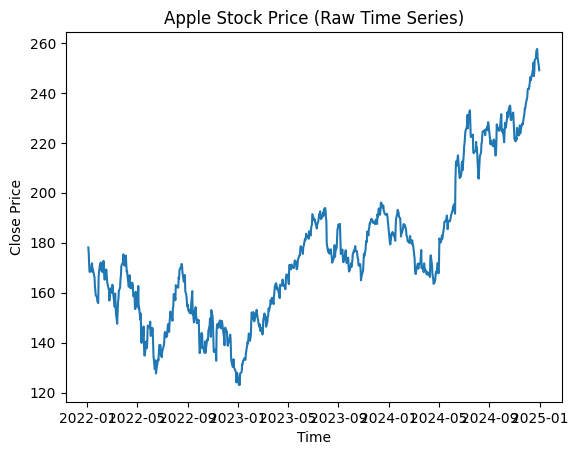

In [3]:
plt.figure()
plt.plot(df['Close'])
plt.title("Apple Stock Price (Raw Time Series)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()

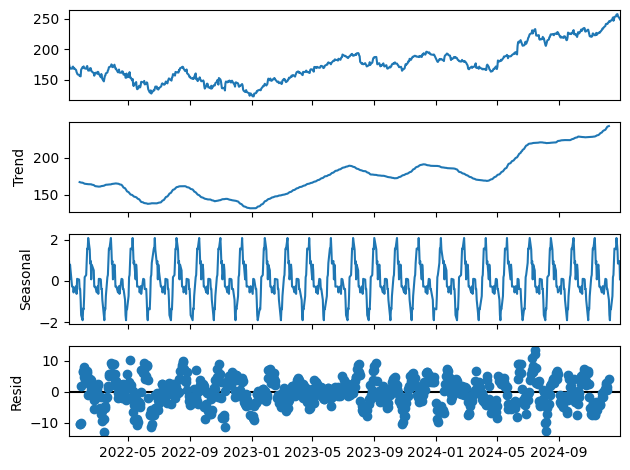

In [4]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

decomposition.plot()
plt.show()

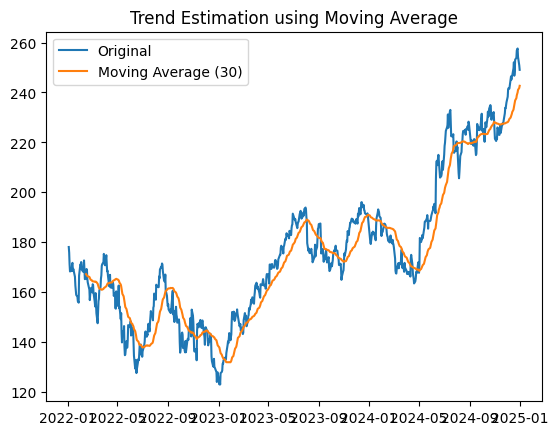

In [5]:
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure()
plt.plot(df['Close'], label='Original')
plt.plot(df['MA_30'], label='Moving Average (30)')
plt.legend()
plt.title("Trend Estimation using Moving Average")
plt.show()

In [6]:
#Train-Test Split
train = df[:-30]
test = df[-30:]

In [7]:
model = ARIMA(train['Close'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

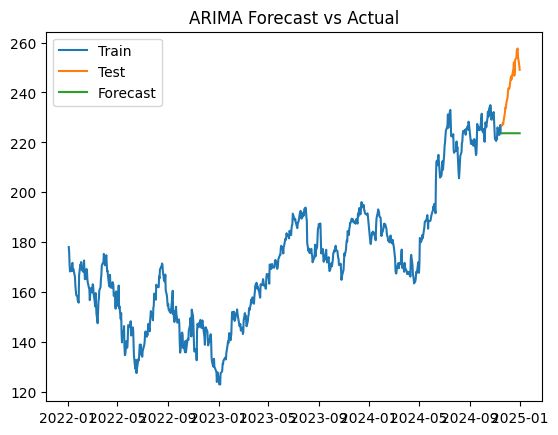

In [8]:
plt.figure()
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

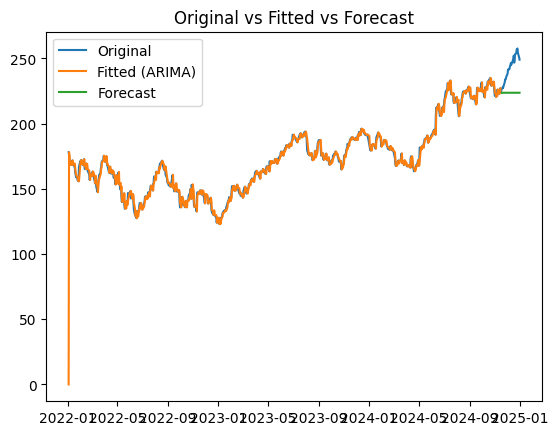

In [10]:
# Get fitted values (in-sample prediction)
fitted = model_fit.fittedvalues

plt.figure()

# Original data
plt.plot(df['Close'], label='Original')

# Fitted values (on training data)
plt.plot(train.index, fitted, label='Fitted (ARIMA)')

# Forecast (next 30 days)
plt.plot(test.index, forecast, label='Forecast')

plt.legend()
plt.title("Original vs Fitted vs Forecast")
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Close'], forecast)
print("MAE:", mae)

MAE: 19.003140934375377
